In [126]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
import matplotlib.pyplot as plt



In [125]:
feature_data = pd.read_csv("relevant_features_single_tags.csv")

In [127]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 7,
}

In [128]:
intertia = []
silhouette_coef = []

for k in range(1, 11):
    print(k)
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(feature_data)
    intertia.append(kmeans.inertia_)

    # if (k != 1):
    #     silhouette_coef.append(silhouette_score(feature_data, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10


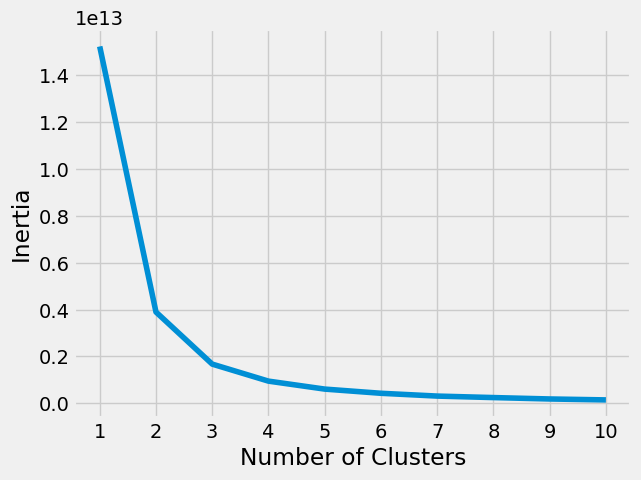

In [129]:
plt.plot(range(1, 11), intertia)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [130]:
kl = KneeLocator(
    range(1, 11), intertia, curve="convex", direction="decreasing"
)

print(kl.elbow)

3


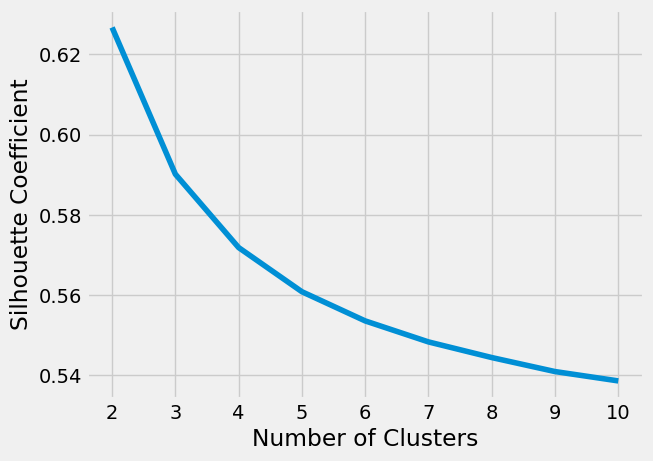

In [85]:
plt.plot(range(2, 11), silhouette_coef)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [147]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(feature_data)

kmeans_3_centers = {
    "centers": kmeans.cluster_centers_,
    "labels": kmeans.labels_,
    "intertia": kmeans.inertia_,
    "iterations": kmeans.n_iter_,
    "features": kmeans.n_features_in_,
    "feature names": kmeans.feature_names_in_
}

In [139]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

In [148]:
labeled_data = pd.read_csv("single_tags.csv")


print(parse_tags(labeled_data._get_value(12, "seeds")))

['aggressive']


In [149]:
tags_represented = {
    0: {},
    1: {},
    2: {},
}

for i in np.unique(kmeans_3_centers["labels"]):
    indices = np.where(kmeans_3_centers["labels"] == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{0: {'aggressive': 609, 'angry': 593, 'angst-ridden': 7, 'confrontational': 15, 'defiant': 46, 'demonic': 39, 'explosive': 76, 'fierce': 447, 'harsh': 221, 'hostile': 8, 'hyper': 183, 'intense': 443, 'malevolent': 4, 'manic': 82, 'menacing': 131, 'nihilistic': 14, 'ominous': 183, 'outraged': 1, 'outrageous': 10, 'provocative': 60, 'rebellious': 49, 'reckless': 14, 'savage': 57, 'uncompromising': 7, 'unsettling': 37, 'visceral': 13, 'volatile': 10, 'apocalyptic': 163, 'dark': 463, 'eerie': 461, 'feral': 1, 'fractured': 30, 'gloomy': 513, 'halloween': 334, 'macabre': 70, 'paranoid': 177, 'scary': 341, 'spooky': 440, 'suffocating': 1, 'suspenseful': 8, 'threatening': 2, 'urgent': 96, 'bitter': 346, 'bleak': 115, 'brittle': 14, 'cold': 437, 'grim': 67, 'lonely': 444, 'nocturnal': 263, 'delicate': 303, 'dreamy': 342, 'ethereal': 361, 'gentle': 447, 'intimate': 334, 'introspective': 266, 'languid': 1, 'lazy': 541, 'meditative': 396, 'pastoral': 50, 'relaxed': 472, 'reserved': 1, 'restrained'

In [150]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

print(cluster_zero)


{'outraged': 1, 'feral': 1, 'suffocating': 1, 'languid': 1, 'reserved': 1, 'capricious': 1, 'snide': 1, 'threatening': 2, 'restrained': 3, 'malevolent': 4, 'acerbic': 5, 'angst-ridden': 7, 'uncompromising': 7, 'hostile': 8, 'suspenseful': 8, 'outrageous': 10, 'volatile': 10, 'visceral': 13, 'nihilistic': 14, 'reckless': 14, 'brittle': 14, 'sardonic': 14, 'confrontational': 15, 'elaborate': 15, 'satirical': 16, 'brassy': 18, 'ambitious': 24, 'brash': 28, 'fractured': 30, 'wry': 36, 'unsettling': 37, 'demonic': 39, 'devotional': 41, 'defiant': 46, 'rebellious': 49, 'pastoral': 50, 'savage': 57, 'provocative': 60, 'grim': 67, 'macabre': 70, 'explosive': 76, 'manic': 82, 'urgent': 96, 'cathartic': 101, 'enigmatic': 109, 'bleak': 115, 'sparse': 123, 'sarcastic': 128, 'menacing': 131, 'apocalyptic': 163, 'paranoid': 177, 'hyper': 183, 'ominous': 183, 'harsh': 221, 'ironic': 229, 'nocturnal': 263, 'introspective': 266, 'eccentric': 276, 'delicate': 303, 'halloween': 334, 'intimate': 334, 'sca

In [143]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

print(cluster_one)

{'languid': 1, 'reserved': 1, 'capricious': 1, 'snide': 1, 'feverish': 2, 'restrained': 3, 'hedonistic': 3, 'reverent': 3, 'acerbic': 5, 'ornate': 5, 'indulgent': 6, 'freewheeling': 11, 'animated': 12, 'sardonic': 14, 'elaborate': 15, 'campy': 15, 'satirical': 16, 'brassy': 18, 'hungry': 19, 'ambitious': 24, 'brash': 28, 'wry': 36, 'devotional': 41, 'pastoral': 50, 'comic': 67, 'carefree': 80, 'fun': 81, 'cathartic': 101, 'enigmatic': 109, 'sparse': 123, 'sarcastic': 128, 'monumental': 192, 'theatrical': 205, 'stylish': 217, 'ironic': 229, 'introspective': 266, 'eccentric': 276, 'ethereal': 286, 'mystical': 333, 'intimate': 334, 'meditative': 396, 'soothing': 443, 'gentle': 447, 'dramatic': 447, 'mysterious': 450, 'relaxed': 472, 'uplifting': 512, 'cheerful': 515, 'spiritual': 518, 'lazy': 541, 'lush': 547, 'epic': 584}


In [144]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

print(cluster_two)

{'jovial': 1, 'ramshackle': 2, 'austere': 2, 'gleeful': 4, 'giddy': 9, 'self-conscious': 11, 'detached': 27, 'clinical': 35, 'earnest': 55, 'ecstatic': 63, 'spicy': 67, 'rustic': 75, 'joyous': 114, 'cerebral': 119, 'crunchy': 146, 'complex': 221, 'earthy': 249, 'sexual': 269, 'euphoric': 303, 'humorous': 316, 'passionate': 335, 'witty': 391, 'playful': 403, 'fun': 430, 'organic': 435, 'silly': 436, 'gritty': 452, 'sensual': 466, 'warm': 496, 'happy': 501, 'exotic': 536, 'positive': 537, 'erotic': 594, 'romantic': 608, 'sexy': 640, 'sleazy': 725}


In [156]:
kmeans_3_labeled = pd.read_csv("single_tags.csv")
print(kmeans_3_labeled.shape)
kmeans_3_labeled.insert(len(kmeans_3_labeled.columns), "Labels", kmeans_3_centers["labels"], True)

print(kmeans_3_labeled.shape)

kmeans_3_labeled.to_csv("kmeans_3.csv")

(48390, 23)
(48390, 24)


In [162]:
#Song Sampling

c1_idx = np.where(kmeans_3_centers["labels"] == 0)[0]
c2_idx = np.where(kmeans_3_centers["labels"] == 1)[0]
c3_idx = np.where(kmeans_3_centers["labels"] == 2)[0]

c1_sample = np.random.choice(c1_idx, size=10, replace=False)
c2_sample = np.random.choice(c2_idx, size=10, replace=False)
c3_sample = np.random.choice(c3_idx, size=10, replace=False)

print("Cluster 1")
print(kmeans_3_labeled.loc[c1_sample])
print("Cluster 2")
print(kmeans_3_labeled.loc[c2_sample])
print("Cluster 3")
print(kmeans_3_labeled.loc[c3_sample])



Cluster 1
       Unnamed: 0                          track                    artist  \
10171       15384  Tell Your Friends (Part Deux)            Mary Prankster   
4661         7296      Lament (Over the Shadows)           Christian Death   
7364        10750                 North Atlantic  Icebreaker International   
4138         6611              Doubtful Comforts                Blue Roses   
124           184                         Warren                     Slint   
11017       16482                  Gossamer Mist                Nox Arcana   
5029         7770                      The Witch                The Sonics   
9882        14954     Photo From A Car In Winter             Dave Fischoff   
13028       19895         What We Need Is A Hero            Alan Silvestri   
9346        14207                   Watts Towers        Porn Sword Tobacco   

                   seeds              spotify_id  danceability  energy  key  \
10171  ['introspective']  0bPHraPpisxDJoNTaiJ79T    